# AULA 07 - TRANSFORMADA DE FOURIER:

## 1 - Importações Básicas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MRPy import MRPy

## 2 - Função:

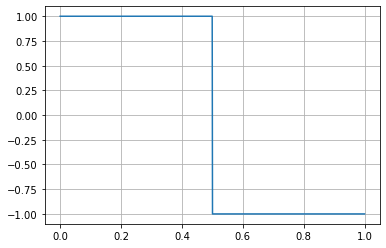

In [2]:
T = 1         # Periodo da função, em segundos
N = 1000     # pontos de discretização

t = np.linspace(0,T,N)
f1 = np.zeros(N)

f1[:N//2] = 2.0   # primeiro meio período é colocado
f1 = f1 -1        # trazemos a média da função para zero

plt.plot(t,f1)
plt.grid(1)

## 3 - Serie de Fourier:

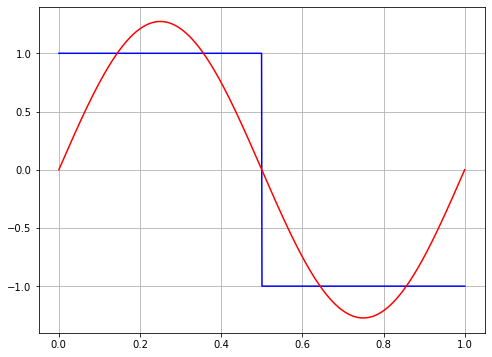

In [3]:
Nk = 1
f2 = np.zeros(N)

for k in range(1, Nk+1,2):
    wk = 2*k*np.pi/T
    f2 += np.sin(wk*t)/k
    
f2 *= 4/np.pi

plt.figure(5,figsize=(8,6), clear=True)
plt.plot(t, f1, 'b', t, f2, 'r')
plt.grid(1)

## 4 - Transformada Rápida de Fourier:

In [4]:
N = 10                # Tamanho da série temporal
f1 = 3*np.ones(N)    # valor constante 3
F = np.fft.fft(f1)   # chamando a função FFT
f2= np.fft.ifft(F)    # transformada inversa

np.set_printoptions(precision = 3)

print(f1)
print(F.real)
print(F.imag)
print(f2.real)

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[30.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


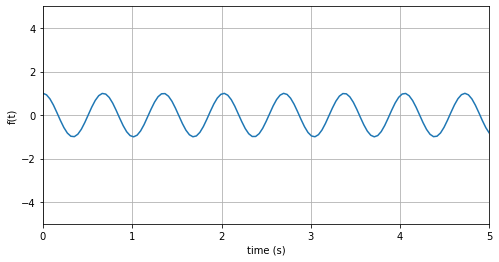

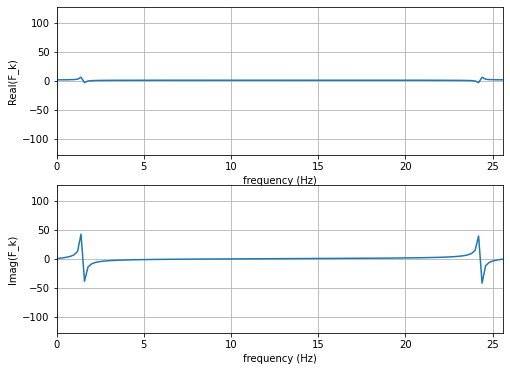

In [5]:
T = 5                      # tempo total de duração da série
N = 128                    # tamanho da série temporal
f0 = 1.4813                      # frequência do seno/coseno (Hz)

k = np.arange(0,N+1)        # vetor enumarado de 0 a N
ti = k*T/N                  # discretização do domínio do tempo           
fk = k/T                    # discretização do domínio da frequência

ci = np.cos(2*np.pi*f0*ti)+0*np.cos(2*np.pi*1.5*f0*ti)
Ck = np.fft.fft(ci)

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(ti, ci)
plt.xlim( 0, T);  plt.xlabel('time (s)') 
plt.ylim(-5, 5);  plt.ylabel('f(t)') 
plt.grid(True) 

plt.figure(3, figsize=(8, 6), clear=True)

plt.subplot(2,1,1)
plt.plot(fk, Ck.real)
plt.xlim( 0, N/T);  plt.xlabel('frequency (Hz)')
plt.ylim(-N, N  );  plt.ylabel('Real(F_k)') 
plt.grid(True) 

plt.subplot(2,1,2)
plt.plot(fk, Ck.imag)
plt.xlim( 0, N/T);  plt.xlabel('frequency (Hz)')
plt.ylim(-N, N  );  plt.ylabel('Imag(F_k)') 
plt.grid(True)

## 4 - Densidade Espectral e Periodograma:

Em procedimento de sinal, o ruído branco é um sinal aleatório com igual intensidade em diferentes frequências, o que lhe dá uma densidade espectral de potência constante

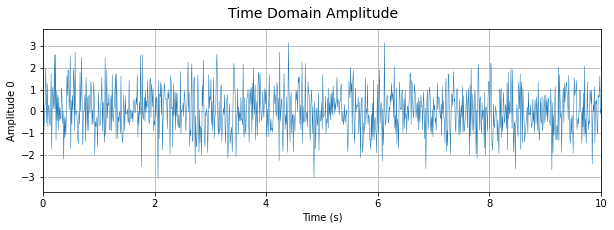

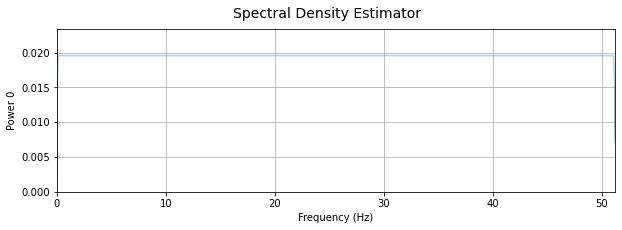

In [19]:
X = MRPy.white_noise(1, 1024, Td=10)

# a função MRPy.white_noise() gera um ruído branco quase perfeito

f1 = X.plot_time(1, figsize=(10,3))
f2 = X.plot_freq(2, figsize=(10,3))

0.9983962916710004


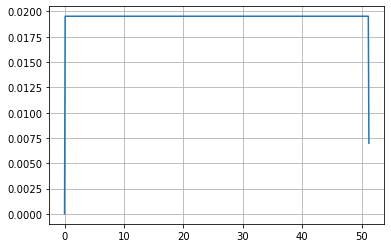

In [33]:
SX, fs = X.periodogram()
f = X.f_axis()

plt.figure(1)
plt.plot(f, SX[0])
plt.grid(1)

sX2 = np.trapz(SX[0], f)
print(sX2)

## 5 - Exemplo com Sinal de Acelerômetro:

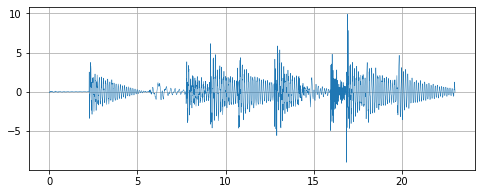

In [45]:
data = MRPy.from_file('resources/data/iNVH001', form='invh').zero_mean()
az = MRPy(data[2], data.fs)
t = az.t_axis()

plt.figure(1, figsize=(8, 3), clear=True)
plt.plot(t, az[0], lw=0.5)
plt.grid(1)

Frequency at spectrum peak:  8.30Hz


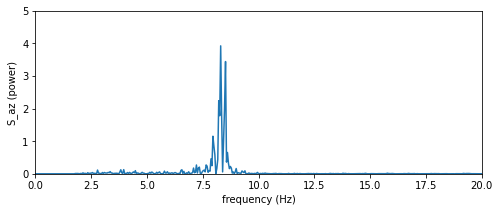

In [54]:
Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(1, figsize=(8,3), clear=True)
plt.plot(f, Saz[0])
plt.xlim(0, 20);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  5);   plt.ylabel('S_az (power)') 

kf = Saz[0].argmax()
print('Frequency at spectrum peak: {0:5.2f}Hz'.format(f[kf]))